In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.sql.expression import text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date = dt.datetime.fromisoformat(most_recent_date)
most_recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


In [11]:
# Calculate the date one year from the last date in data set.
yr_ago = most_recent_date - dt.timedelta(days=365)
yr_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [12]:
# Perform a query to retrieve the data and precipitation scores
one_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
one_year_prcp[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_12_df = pd.DataFrame(one_year_prcp, columns=['date', 'prcp'])
prcp_12_df.set_index('date', inplace=True)
# Sort the dataframe by date
prcp_12_df = prcp_12_df.sort_values(by=['date'])
prcp_12_df.head()

,prcp
date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8


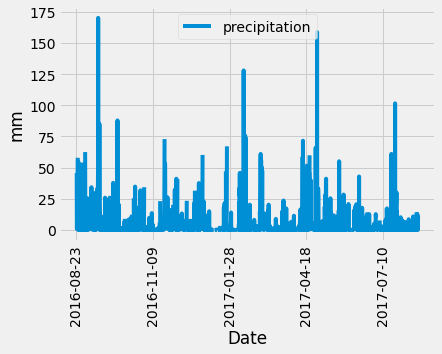

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_12_df.plot(rot=90)
plt.legend(["precipitation"])
plt.ylabel("mm")
plt.xlabel("Date")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_12_df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).group_by(Station.id).count()
print(stations)

9


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_station = stations[0][0]
stations

[('USC00519281',),
 ('USC00519397',),
 ('USC00513117',),
 ('USC00519523',),
 ('USC00516128',),
 ('USC00514830',),
 ('USC00511918',),
 ('USC00517948',),
 ('USC00518838',)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()


[(12.2, 29.4, 22.03582251082252)]

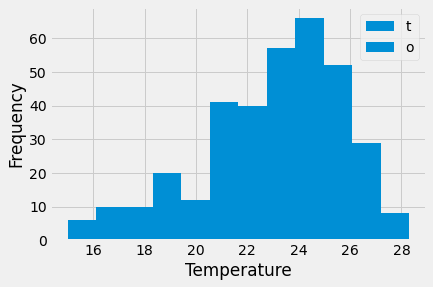

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stn_tobs = session.query(Measurement.tobs).\
    filter(Measurement.date >= yr_ago).\
    filter(Measurement.date <= most_recent_date).\
    filter(Measurement.station==most_active_station).all()

tobs_array = np.ravel(stn_tobs)
tobs_series = pd.Series(tobs_array)

tobs_series.plot.hist(bins=12)
plt.legend("tobs")
plt.xlabel("Temperature")
plt.show()

# Close session

In [20]:
# Close Session
session.close()